In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Data

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

### Feature Engineering

In [4]:
x = wine_quality.data.features
y = wine_quality.data.targets
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### Backward Elimation

In [5]:
x = np.append(arr = np.ones((6497, 1)).astype(int), values=x, axis=1)  
x

array([[ 1.  ,  7.4 ,  0.7 , ...,  3.51,  0.56,  9.4 ],
       [ 1.  ,  7.8 ,  0.88, ...,  3.2 ,  0.68,  9.8 ],
       [ 1.  ,  7.8 ,  0.76, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 1.  ,  6.5 ,  0.24, ...,  2.99,  0.46,  9.4 ],
       [ 1.  ,  5.5 ,  0.29, ...,  3.34,  0.38, 12.8 ],
       [ 1.  ,  6.  ,  0.21, ...,  3.26,  0.32, 11.8 ]])

In [6]:
import statsmodels.api as sm
x_opt=x [:, [0,1,2,3,4,5,6,7,8,9,10,11]]  
regressor_OLS=sm.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:18:49   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.7627     11.894      4.688      0.000      32.447      79.079
x1             0.0677      0.016      4.346      0.000       0.037       0.098
x2            -1.3279      0.077    -17.162      0.000      -1.480      -1.176
x3            -0.1097      0.080     -1.377      0.168      -0.266       0.046
x4             0.0436      0.005      8.449      0.000       0.033       0.054
x5            -0.4837      0.333     -1.454      0.146      -1.136       0.168
x6             0.0060      0.001      7.948      0.000       0.004       0.007
x7            -0.0025      0.000     -8.969      0.000      -0.003      -0.002
x8           -54.9669     12.137     -4.529      0.000     -78.760     -31.173
x9             0.4393      0.090      4.861      0.000       0.262       0.616
x10            0.7683      0.076     10.092      0.000       0.619       0.917
x11            0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
x_opt=x [:, [0,1,2,4,6,7,8,9,10,11]]  
regressor_OLS=sm.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:18:49   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0409     11.645      5.156      0.000      37.212      82.870
x1             0.0662      0.015      4.412      0.000       0.037       0.096
x2            -1.3043      0.071    -18.445      0.000      -1.443      -1.166
x3             0.0453      0.005      9.024      0.000       0.035       0.055
x4             0.0059      0.001      7.911      0.000       0.004       0.007
x5            -0.0025      0.000     -9.217      0.000      -0.003      -0.002
x6           -59.4185     11.873     -5.004      0.000     -82.694     -36.143
x7             0.4782      0.088      5.411      0.000       0.305       0.651
x8             0.7378      0.075      9.903      0.000       0.592       0.884
x9             0.2647      0.017     15.886      0.000       0.232       0.297
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.085
Skew:                          -0.004   Prob(JB):                     2.56e-71
Kurtosis:                       4.096   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
x = wine_quality.data.features
y = wine_quality.data.targets
x = x.iloc[:,[0,1,3,5,6,7,8,9,10]]
x

,fixed_acidity,volatile_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,1.9,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,2.6,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,2.3,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,1.9,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,1.9,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,1.6,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,8.0,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,1.2,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,1.1,20.0,110.0,0.98869,3.34,0.38,12.8


### Creating Model

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sc = MinMaxScaler()
x = sc.fit_transform(x)
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.15,random_state=0)
x_train.shape
regressor =  LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
#Checking the score  
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  


Train Score:  0.29251471875762225
Test Score:  0.2857736006162256


# Test,

In [26]:
y_predict = regressor.predict(x_test)
y_predict[0:10,:]

array([[5.45629409],
       [6.33348905],
       [5.73982715],
       [4.71204402],
       [6.13633057],
       [5.6388503 ],
       [6.13367873],
       [5.545079  ],
       [5.75823917],
       [6.30777377]])

In [27]:
y_predict_round = []
for i in range(len(y_predict)):
    y_predict_round.append(round(y_predict[i][0]))
y_predict_round = np.array(y_predict_round)
y_predict_round = y_predict_round.reshape(len(y_predict_round),1)
y_predict_round[0:10,:]

array([[5],
       [6],
       [6],
       [5],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6]])

### Visualiton

In [28]:
y_test = np.array(y_test)
y_predicted_visualization = y_predict_round[0:50,:]
y_test_visulaztion = y_test[0:50,:]

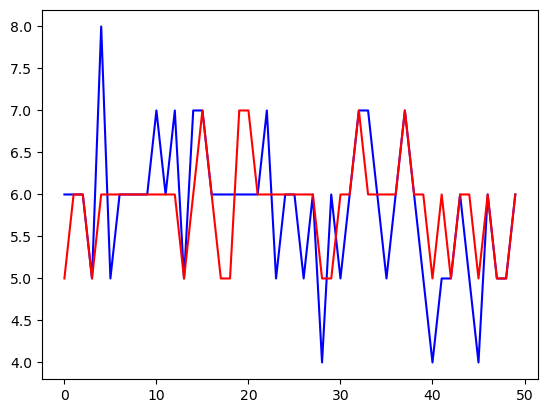

In [29]:
plt.plot(range(50),y_test_visulaztion,color ="blue")
plt.plot(range(50),y_predicted_visualization, color = "red")

### Evalute Accuracy

In [31]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
accuracy_score(y_predict_round,y_test)

0.5087179487179487

In [32]:
confusion_matrix(y_predict_round,y_test)

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0],
       [  3,  18, 136,  75,   8,   0,   0],
       [  2,  16, 165, 323, 115,  19,   0],
       [  0,   0,   1,  43,  37,  12,   1],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)